In [16]:
# import dependecies 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

# paths for all .csv
northcsv = Path("../Resources/northern_county_market.csv")
centralcsv = Path("../Resources/central_county_market.csv")
southerncsv = Path("../Resources/southern_county_market.csv")
fullcsv = Path("../Resources/fullcleaned_county_market_tracker.csv")

# read all csv files
north_df = pd.read_csv(northcsv)
central_df = pd.read_csv(centralcsv)
southern_df = pd.read_csv(southerncsv)
full_df = pd.read_csv(fullcsv)

In [17]:
# check northern DF
north_df.head()

,Start Date,End Date,County,Region,State,Property Type,Median Sale Price,Median Sale Price MoM,Median List Price,Median List Price MoM,...,Median Days on Market,Median Days on Market MoM,Average Sale to List,Average Sale to List MoM,Sold Above List,Sold Above List MoM,Price Drops,Price Drops MoM,Off Market in Two Weeks,Off Market in Two Weeks MoM
0,2015-05-01,2015-05-31,Bergen County,North,NJ,All Residential,"$420,000.00",NaN,"$475,000.00",NaN,...,69,NaN,96.28%,NaN,14.84%,NaN,20.29%,0.00%,26.54%,NaN
1,2015-05-01,2015-05-31,Bergen County,North,NJ,Condo,"$236,750.00",NaN,"$475,000.00",NaN,...,91,NaN,95.33%,NaN,10.66%,NaN,17.28%,0.00%,16.84%,NaN
2,2015-05-01,2015-05-31,Bergen County,North,NJ,Multi-Family (2-4 Unit),"$392,000.00",NaN,"$475,000.00",NaN,...,114,NaN,95.29%,NaN,17.02%,NaN,17.10%,0.00%,26.42%,NaN
3,2015-05-01,2015-05-31,Bergen County,North,NJ,Single Family Residential,"$461,000.00",NaN,"$475,000.00",NaN,...,60,NaN,96.61%,NaN,16.40%,NaN,22.26%,0.00%,28.61%,NaN
4,2015-05-01,2015-05-31,Bergen County,North,NJ,Townhouse,"$426,000.00",NaN,"$475,000.00",NaN,...,72,NaN,95.86%,NaN,3.12%,NaN,19.71%,0.00%,18.18%,NaN


In [18]:
# check central DF
central_df.head()

,Start Date,End Date,County,Region,State,Property Type,Median Sale Price,Median Sale Price MoM,Median List Price,Median List Price MoM,...,Median Days on Market,Median Days on Market MoM,Average Sale to List,Average Sale to List MoM,Sold Above List,Sold Above List MoM,Price Drops,Price Drops MoM,Off Market in Two Weeks,Off Market in Two Weeks MoM
0,2015-05-01,2015-05-31,Hunterdon County,Central,NJ,All Residential,"$355,000.00",NaN,"$409,500.00",NaN,...,83,NaN,96.45%,NaN,12.10%,NaN,23.52%,0.00%,19.08%,NaN
1,2015-05-01,2015-05-31,Hunterdon County,Central,NJ,Multi-Family (2-4 Unit),"$177,500.00",NaN,"$409,500.00",NaN,...,0,NaN,83.97%,NaN,0.00%,NaN,19.05%,0.00%,100.00%,NaN
2,2015-05-01,2015-05-31,Hunterdon County,Central,NJ,Single Family Residential,"$355,000.00",NaN,"$409,500.00",NaN,...,83,NaN,96.64%,NaN,12.30%,NaN,23.53%,0.00%,19.05%,NaN
3,2015-05-01,2015-05-31,Hunterdon County,Central,NJ,Townhouse,"$365,000.00",NaN,"$409,500.00",NaN,...,52,NaN,96.69%,NaN,0.00%,NaN,30.95%,0.00%,0.00%,NaN
4,2015-06-01,2015-06-30,Hunterdon County,Central,NJ,All Residential,"$375,000.00",5.63%,"$385,000.00",-5.98%,...,68,-1500.00%,97.18%,0.73%,7.02%,-5.08%,24.21%,0.70%,15.44%,-3.64%


In [19]:
# check southern DF
southern_df.head()

,Start Date,End Date,County,Region,State,Property Type,Median Sale Price,Median Sale Price MoM,Median List Price,Median List Price MoM,...,Median Days on Market,Median Days on Market MoM,Average Sale to List,Average Sale to List MoM,Sold Above List,Sold Above List MoM,Price Drops,Price Drops MoM,Off Market in Two Weeks,Off Market in Two Weeks MoM
0,2012-01-01,2012-01-31,Atlantic County,Southern,NJ,All Residential,"$191,500.00",8.19%,"$222,450.00",18.96%,...,126,400.00%,91.32%,0.09%,5.29%,-3.85%,0.00%,0.00%,23.53%,-7.33%
1,2012-01-01,2012-01-31,Atlantic County,Southern,NJ,Condo,"$125,000.00",-3.85%,"$222,450.00",18.96%,...,99,-5300.00%,88.52%,-0.22%,2.50%,-0.28%,0.00%,0.00%,18.52%,-8.15%
2,2012-01-01,2012-01-31,Atlantic County,Southern,NJ,Multi-Family (2-4 Unit),"$190,000.00",52.00%,"$222,450.00",18.96%,...,59,-24100.00%,89.90%,15.40%,0.00%,0.00%,0.00%,0.00%,0.00%,-50.00%
3,2012-01-01,2012-01-31,Atlantic County,Southern,NJ,Single Family Residential,"$199,000.00",2.05%,"$222,450.00",18.96%,...,128,1200.00%,92.32%,-0.35%,6.96%,-4.81%,0.00%,0.00%,31.15%,1.32%
4,2012-01-01,2012-01-31,Atlantic County,Southern,NJ,Townhouse,"$112,500.00",-43.47%,"$222,450.00",18.96%,...,246,16100.00%,92.03%,5.48%,0.00%,0.00%,0.00%,0.00%,0.00%,-40.00%


In [20]:
# merging all 3 data frames
nsc_merge = pd.concat([north_df, central_df, southern_df], ignore_index=True)

# checking that merge was done correctly
regions = nsc_merge["Region"].unique()
print(regions)

['North' 'Central' 'Southern']


In [21]:
# putting date column into datetime format

nsc_merge['Start Date'] = pd.to_datetime(nsc_merge['Start Date'])
nsc_merge['End Date'] = pd.to_datetime(nsc_merge['End Date'])

In [22]:
# Filter data starting from 2022
start_date = pd.Timestamp('2022-01-01')
filtered_data = nsc_merge[nsc_merge['Start Date'] >= start_date]

# Check the format of "Sold Above List" column
print(filtered_data['Sold Above List'].head())

# Convert "Sold Above List" to numeric, forcing any errors to NaN
filtered_data['Sold Above List'] = pd.to_numeric(filtered_data['Sold Above List'].str.replace('%', ''), errors='coerce')

# Convert "Median List Price per Sqft" to numeric
filtered_data['Median List Price per Sqft'] = pd.to_numeric(filtered_data['Median List Price per Sqft'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# Filter necessary columns for "Sold Above List"
plot_data_sold = filtered_data[['Start Date', 'Region', 'Sold Above List']].dropna(subset=['Sold Above List'])


400    41.76%
401    21.62%
402    51.81%
403    47.04%
404    27.27%
Name: Sold Above List, dtype: object


C:\Users\kimmi\AppData\Local\Temp\ipykernel_22408\4259097576.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Sold Above List'] = pd.to_numeric(filtered_data['Sold Above List'].str.replace('%', ''), errors='coerce')
C:\Users\kimmi\AppData\Local\Temp\ipykernel_22408\4259097576.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Median List Price per Sqft'] = pd.to_numeric(filtered_data['Median List Price per Sqft'].str.replace('$', '').str.replace(',', ''), errors='coerce')


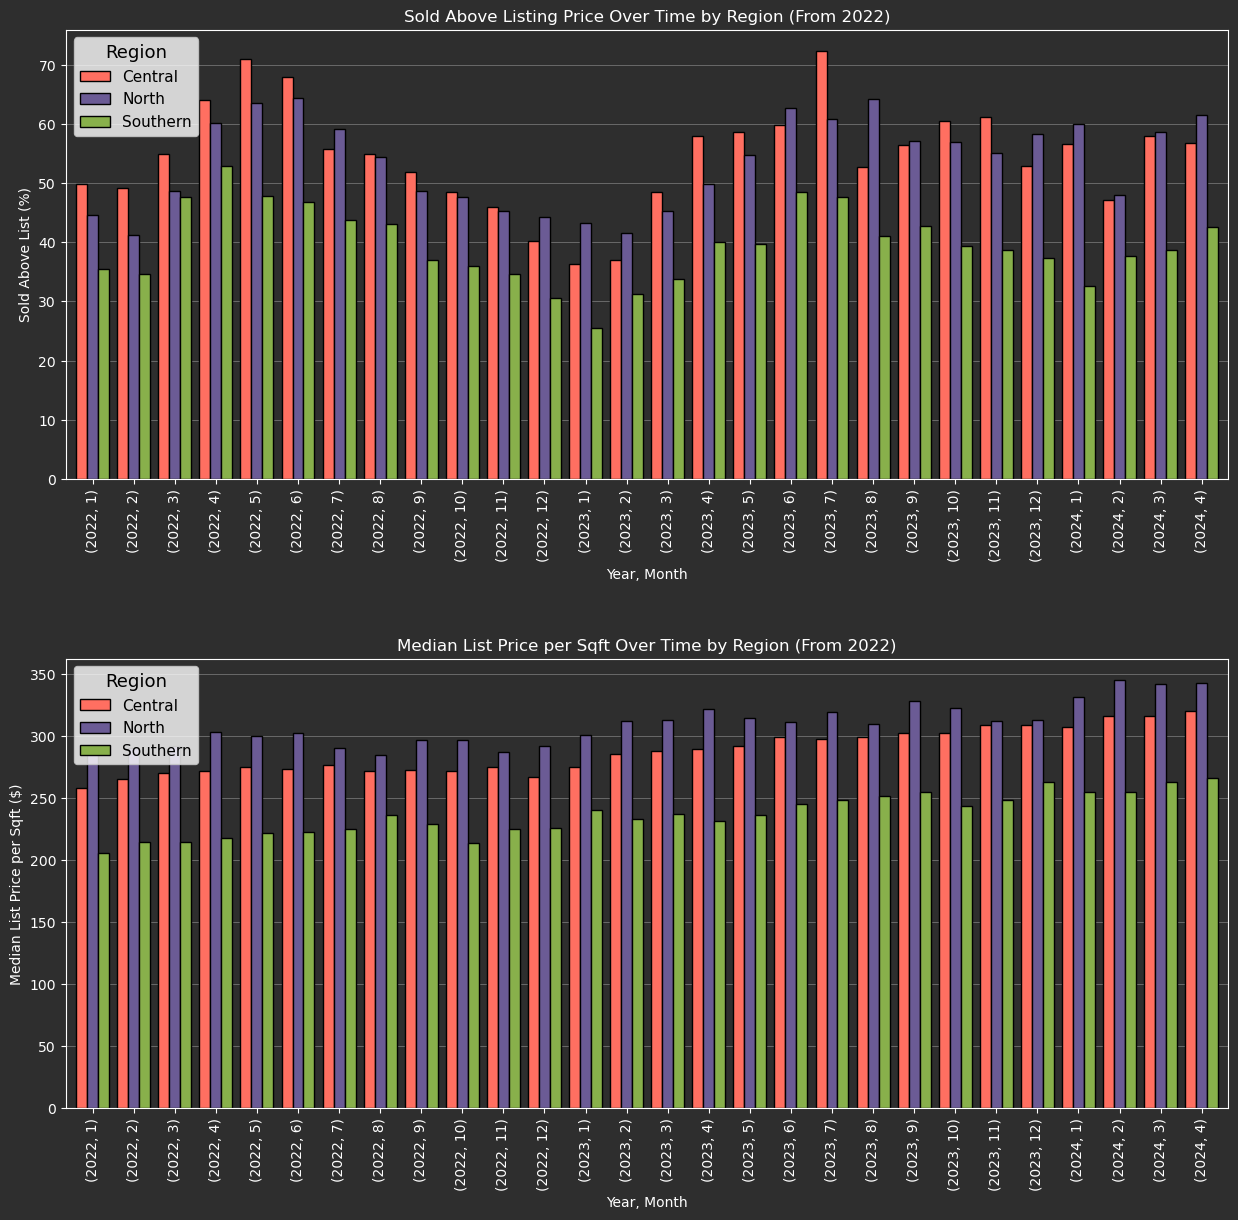

In [23]:
# Extract year and month for grouping
plot_data_sold['Year'] = plot_data_sold['Start Date'].dt.year
plot_data_sold['Month'] = plot_data_sold['Start Date'].dt.month

# Aggregate data to get mean "Sold Above List" per month per region
agg_data_sold = plot_data_sold.groupby(['Year', 'Month', 'Region']).mean().reset_index()

# Pivot the data for better plotting
pivot_data_sold = agg_data_sold.pivot_table(index=['Year', 'Month'], columns='Region', values='Sold Above List')

# Filter necessary columns for "Median List Price per Sqft"
plot_data_median = filtered_data[['Start Date', 'Region', 'Median List Price per Sqft']].dropna(subset=['Median List Price per Sqft'])

# Extract year and month for grouping
plot_data_median['Year'] = plot_data_median['Start Date'].dt.year
plot_data_median['Month'] = plot_data_median['Start Date'].dt.month

# Agg data to get mean "Median List Price per Sqft" per month per region
agg_data_median = plot_data_median.groupby(['Year', 'Month', 'Region']).mean().reset_index()

# Pivot the data for better plotting
pivot_data_median = agg_data_median.pivot_table(index=['Year', 'Month'], columns='Region', values='Median List Price per Sqft')

# Set up plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 14))

# Define custom colors
colors = ['#FF6F61', '#6B5B95', '#88B04B']
edgecolors = ['black', 'black', 'black'] # defining edge colors

# Plot "Sold Above List" data with edgecolor
pivot_data_sold.plot(kind='bar', ax=ax1, color=colors, width=0.8, edgecolor=edgecolors)
ax1.set_title('Sold Above Listing Price Over Time by Region (From 2022)', color='white')
ax1.set_xlabel('Year, Month', color='white')
ax1.set_ylabel('Sold Above List (%)', color='white')
ax1.legend(title='Region', title_fontsize='13', fontsize='11')
ax1.grid(axis='y', color='gray')
ax1.set_axisbelow(True)
ax1.grid(axis='y', color='gray', linestyle='-', linewidth=0.5)
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
for spine in ax1.spines.values():
    spine.set_edgecolor('white')

# Plot "Median List Price per Sqft" data with edgecolor
pivot_data_median.plot(kind='bar', ax=ax2, color=colors, width=0.8, edgecolor=edgecolors)
ax2.set_title('Median List Price per Sqft Over Time by Region (From 2022)', color='white')
ax2.set_xlabel('Year, Month', color='white')
ax2.set_ylabel('Median List Price per Sqft ($)', color='white')
ax2.legend(title='Region', title_fontsize='13', fontsize='11')
ax2.grid(axis='y', color='gray')
ax2.set_axisbelow(True)
ax2.grid(axis='y', color='gray', linestyle='-', linewidth=0.5)
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
for spine in ax2.spines.values():
    spine.set_edgecolor('white')

# Adjust space between plots
plt.subplots_adjust(hspace=0.4)

# Change background colors
dark_grey = '#2E2E2E'
fig.patch.set_facecolor(dark_grey)
ax1.set_facecolor(dark_grey)
ax2.set_facecolor(dark_grey)

# Save image
plt.savefig('../Images/sold_and_median_list_price_by_region.pdf', bbox_inches='tight')

# Display plot
plt.show()

C:\Users\kimmi\AppData\Local\Temp\ipykernel_22408\1058218007.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Sold Above List'] = pd.to_numeric(filtered_data['Sold Above List'].str.replace('%', ''), errors='coerce')


Index(['Year', 'Month', 'Region', 'Start Date', 'Sold Above List'], dtype='object')


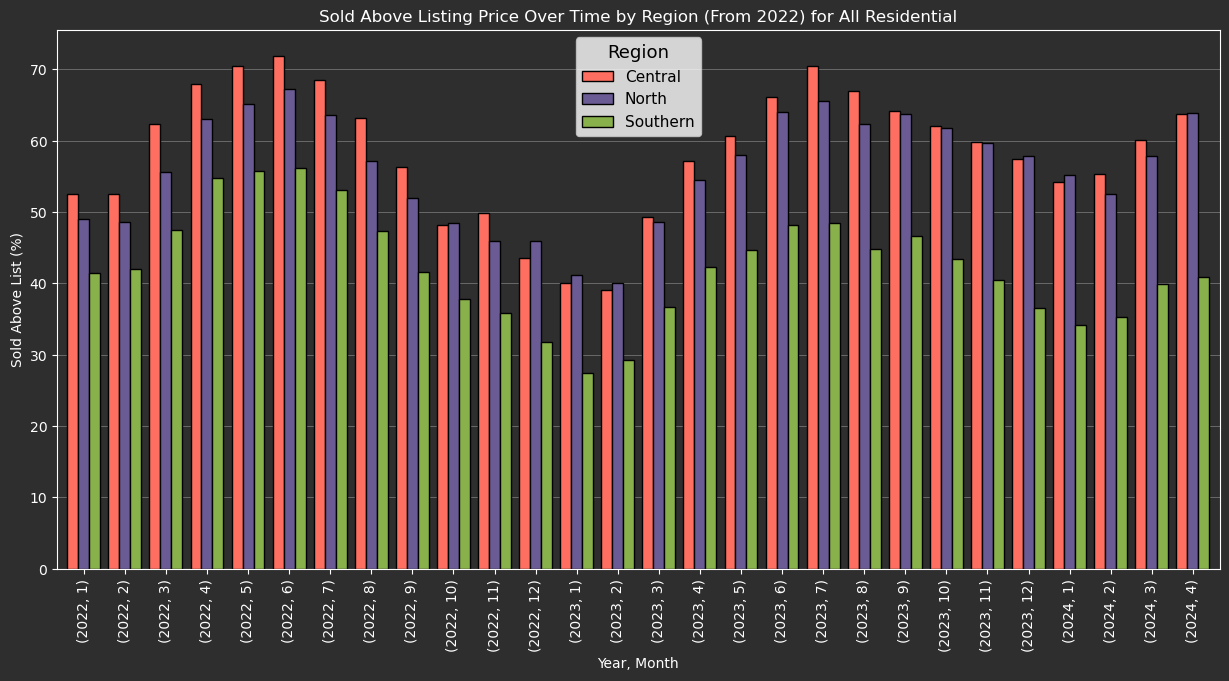

Index(['Year', 'Month', 'Region', 'Start Date', 'Sold Above List'], dtype='object')


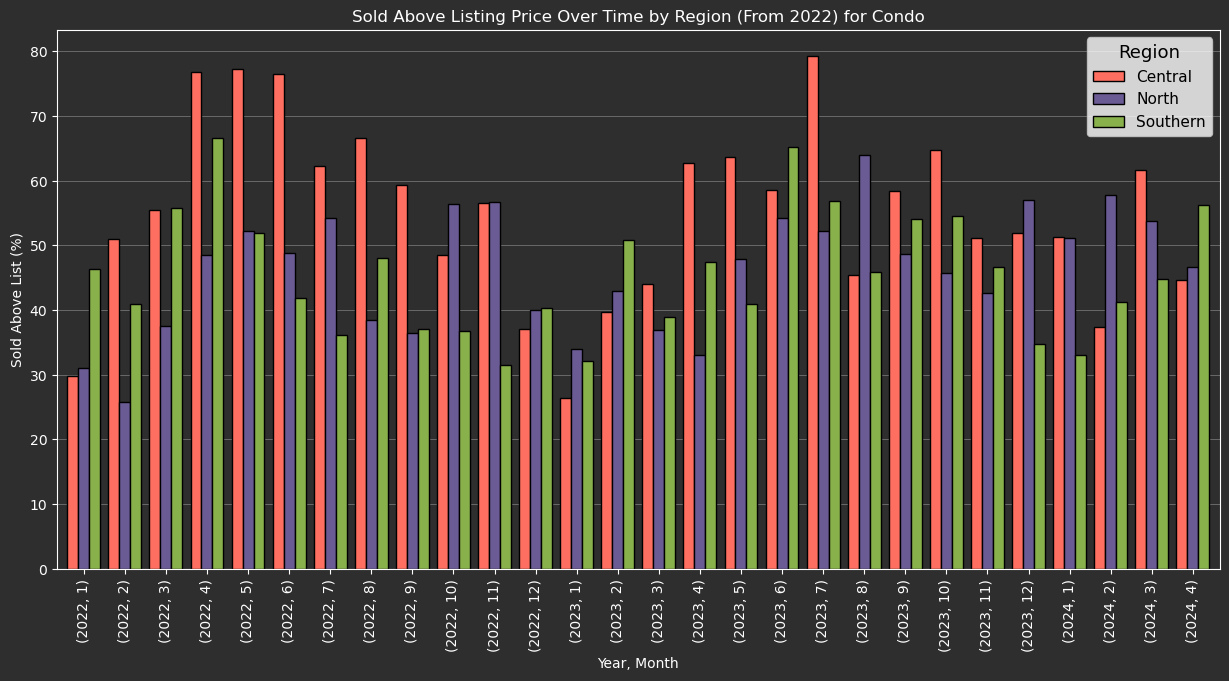

Index(['Year', 'Month', 'Region', 'Start Date', 'Sold Above List'], dtype='object')


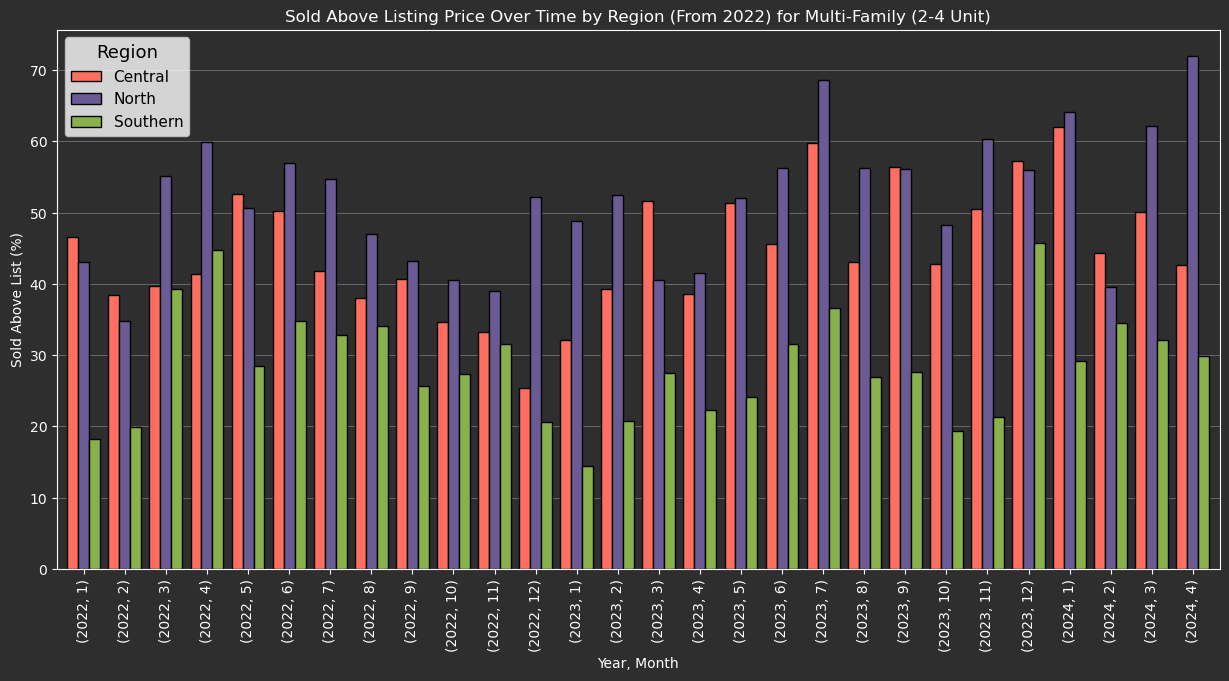

Index(['Year', 'Month', 'Region', 'Start Date', 'Sold Above List'], dtype='object')


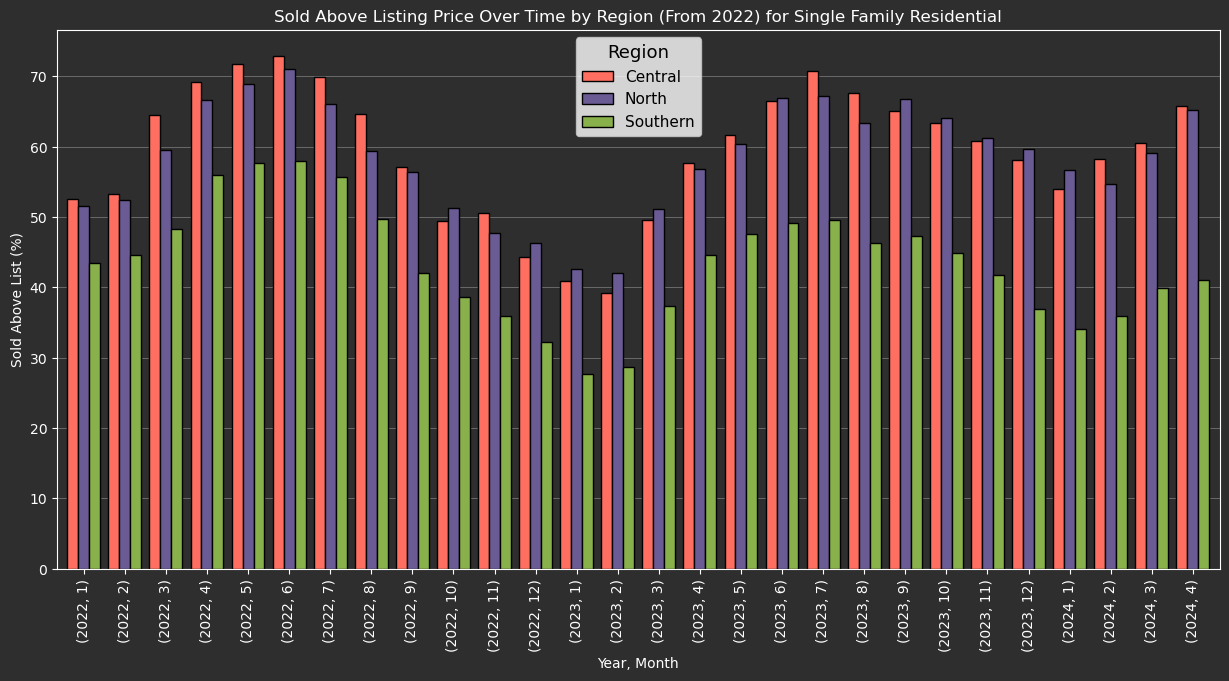

Index(['Year', 'Month', 'Region', 'Start Date', 'Sold Above List'], dtype='object')


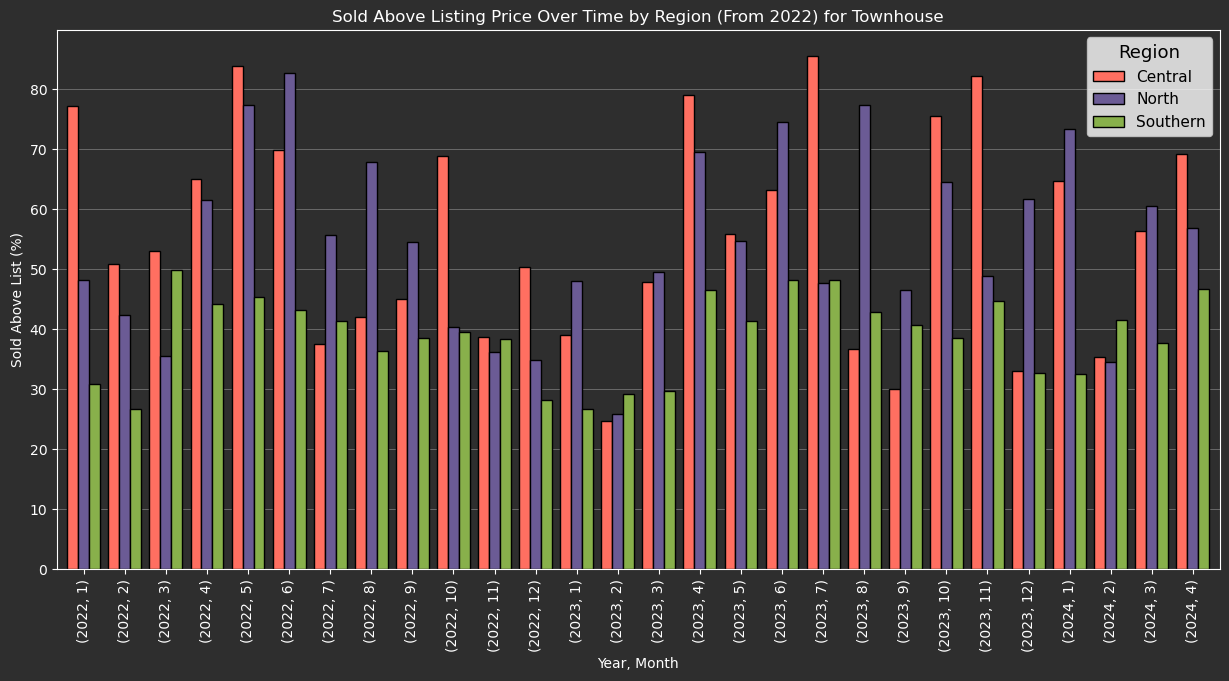

In [24]:
# Filter data starting from 2022
start_date = pd.Timestamp('2022-01-01')
filtered_data = nsc_merge[nsc_merge['Start Date'] >= start_date]

# Convert "Sold Above List" to numeric, forcing any errors to NaN
filtered_data['Sold Above List'] = pd.to_numeric(filtered_data['Sold Above List'].str.replace('%', ''), errors='coerce')

# Define property types
property_types = ["All Residential", "Condo", "Multi-Family (2-4 Unit)", "Single Family Residential", "Townhouse"]

# Set up plot for each property type
for property_type in property_types:
    # Filter data for the current property type
    property_data = filtered_data[filtered_data['Property Type'] == property_type]
    
    # Filter necessary columns
    plot_data = property_data[['Start Date', 'Region', 'Sold Above List']].dropna(subset=['Sold Above List'])

    # Extract year and month for grouping
    plot_data['Year'] = plot_data['Start Date'].dt.year
    plot_data['Month'] = plot_data['Start Date'].dt.month

    # Aggregate data to get mean "Sold Above List" per month per region
    agg_data = plot_data.groupby(['Year', 'Month', 'Region']).mean().reset_index()

    # Ensure columns are available after grouping
    print(agg_data.columns)

    # Pivot the data for better plotting
    pivot_data = agg_data.pivot_table(index=['Year', 'Month'], columns='Region', values='Sold Above List')

    # Set up plot
    fig, ax = plt.subplots(figsize=(15, 7))

    # Define custom colors
    colors = ['#FF6F61', '#6B5B95', '#88B04B']
    edgecolors = ['black', 'black', 'black'] # defining edge colors

    # Plot data with edgecolor
    pivot_data.plot(kind='bar', ax=ax, color=colors, width=0.8, edgecolor=edgecolors)

    # Customize plot
    ax.set_title(f'Sold Above Listing Price Over Time by Region (From 2022) for {property_type}', color='white')
    ax.set_xlabel('Year, Month', color='white')
    ax.set_ylabel('Sold Above List (%)', color='white')
    ax.legend(title='Region', title_fontsize='13', fontsize='11')
    ax.grid(axis='y', color='gray')

    # Adjust grid behind bars
    ax.set_axisbelow(True)
    ax.grid(axis='y', color='gray', linestyle='-', linewidth=0.5)

    # Change tick colors
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    # Change spine colors
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

    # Change background colors
    dark_grey = '#2E2E2E'
    fig.patch.set_facecolor(dark_grey)
    ax.set_facecolor(dark_grey)

    # Save image
    plt.savefig(f'../Images/sold_above_{property_type.replace(" ", "_").replace("/", "_").lower()}.pdf', bbox_inches='tight')

    # Display plot
    plt.show()

C:\Users\kimmi\AppData\Local\Temp\ipykernel_22408\269306257.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis_r')  # Reverse Viridis colormap


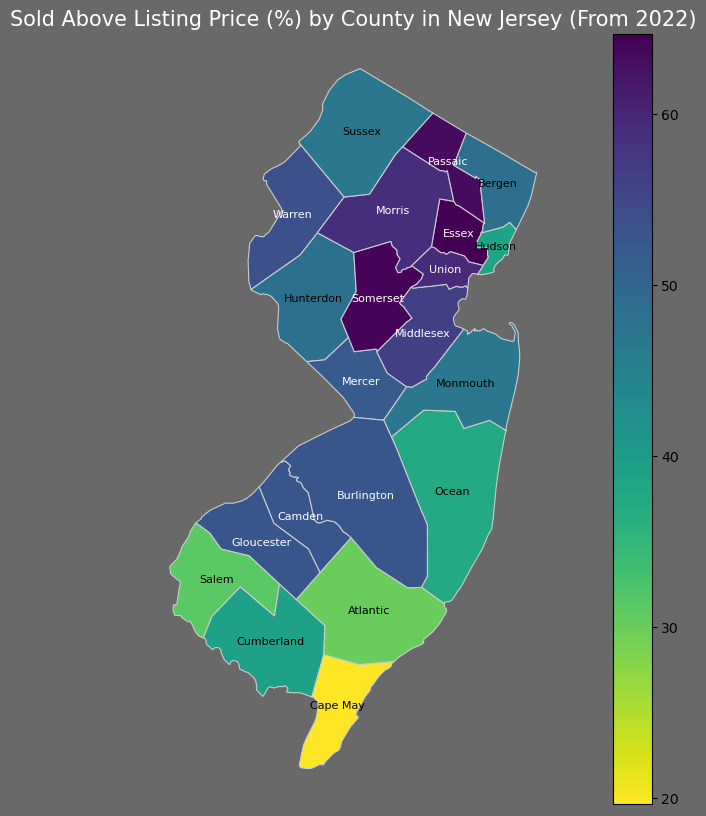

In [25]:
# Group by county and calculate mean Sold Above List
county_data = filtered_data.groupby('County').agg({'Sold Above List': 'mean'}).reset_index()

# read the GeoJSON file for New Jersey counties from US Census Bureau
url = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'
gdf = gpd.read_file(url)

# Filter to include only New Jersey counties (FIPS code starts with '34')
gdf['STATE'] = gdf['id'].str[:2]
nj_gdf = gdf[gdf['STATE'] == '34']

# Remove ' County' suffix from county names in county_data
county_data['County'] = county_data['County'].str.replace(' County', '')

# Merge geos data with the real estate data
merged_gdf = nj_gdf.merge(county_data, how='left', left_on='NAME', right_on='County')

# Set up the plot with dark grey background
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig.patch.set_facecolor('dimgray')  

# Define the color map
cmap = plt.cm.get_cmap('viridis_r')  # Reverse Viridis colormap
cmap.set_under('red')  # Set color for values below the lowest data range

# Plot the data
merged_gdf.plot(column='Sold Above List', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names as annotations with adjusted text color
for idx, row in merged_gdf.iterrows():
    centroid = row['geometry'].centroid
    county_name = row['County']
    
    # Determine contrast text color based on background color
    if merged_gdf.loc[idx, 'Sold Above List'] > 50:
        text_color = 'white'  # Use white text color for darker backgrounds
    else:
        text_color = 'black'  # Use black text color for lighter backgrounds
    
    ax.text(centroid.x, centroid.y, county_name, fontsize=8, ha='center', va='center', color=text_color)

# Customize plot
ax.set_title('Sold Above Listing Price (%) by County in New Jersey (From 2022)', fontsize=15, color='white')  # Set title color to white
ax.set_axis_off()

# Save the plot
plt.savefig('../Images/nj_sold_above_listing_price_heatmap.pdf', bbox_inches='tight')

# Display plot
plt.show()

In [26]:
print(nj_gdf['NAME'].unique())
print(county_data['County'].unique())


['Camden' 'Gloucester' 'Passaic' 'Bergen' 'Cape May' 'Essex' 'Hudson'
 'Hunterdon' 'Mercer' 'Ocean' 'Salem' 'Somerset' 'Warren' 'Morris'
 'Sussex' 'Atlantic' 'Burlington' 'Cumberland' 'Middlesex' 'Monmouth'
 'Union']
['Atlantic' 'Bergen' 'Burlington' 'Camden' 'Cape May' 'Cumberland' 'Essex'
 'Gloucester' 'Hudson' 'Hunterdon' 'Mercer' 'Middlesex' 'Monmouth'
 'Morris' 'Ocean' 'Passaic' 'Salem' 'Somerset' 'Sussex' 'Union' 'Warren']


In [27]:
# Check if 'Somerset' exists in the County column
print(filtered_data['County'].unique())

['Bergen County' 'Essex County' 'Hudson County' 'Morris County'
 'Passaic County' 'Sussex County' 'Warren County' 'Hunterdon County'
 'Mercer County' 'Middlesex County' 'Monmouth County' 'Somerset County'
 'Union County' 'Atlantic County' 'Burlington County' 'Camden County'
 'Cape May County' 'Cumberland County' 'Gloucester County' 'Ocean County'
 'Salem County']


In [28]:
# Convert "Median Price per Sqft" to numeric by removing non-numeric characters and converting to float
filtered_data['Median Price per Sqft'] = filtered_data['Median Price per Sqft'].replace(r'[\$,]', '', regex=True).astype(float)

# Filter the data for Somerset County
somerset_data = filtered_data[filtered_data['County'] == 'Somerset County']

# Group by property type and aggregate count and average cost
property_summary = somerset_data.groupby('Property Type').agg(
    Number_of_Properties=('Property Type', 'count'),
    Average_Price_per_Sqft=('Median Price per Sqft', 'mean')
).reset_index()

# Rename columns
property_summary = property_summary.rename(columns={
    'Number_of_Properties': 'Number of Properties',
    'Average_Price_per_Sqft': 'Average Price per Sqft'
})

# # Format Average Price per Sqft with dollar sign
# property_summary['Average Price per Sqft'] = property_summary['Average Price per Sqft'].apply(lambda x: f"${x:,.2f}")

property_summary

C:\Users\kimmi\AppData\Local\Temp\ipykernel_22408\1269494574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Median Price per Sqft'] = filtered_data['Median Price per Sqft'].replace(r'[\$,]', '', regex=True).astype(float)


,Property Type,Number of Properties,Average Price per Sqft
0,All Residential,28,298.287857
1,Condo,27,272.082963
2,Multi-Family (2-4 Unit),28,242.470000
3,Single Family Residential,28,300.246786
4,Townhouse,24,279.538696


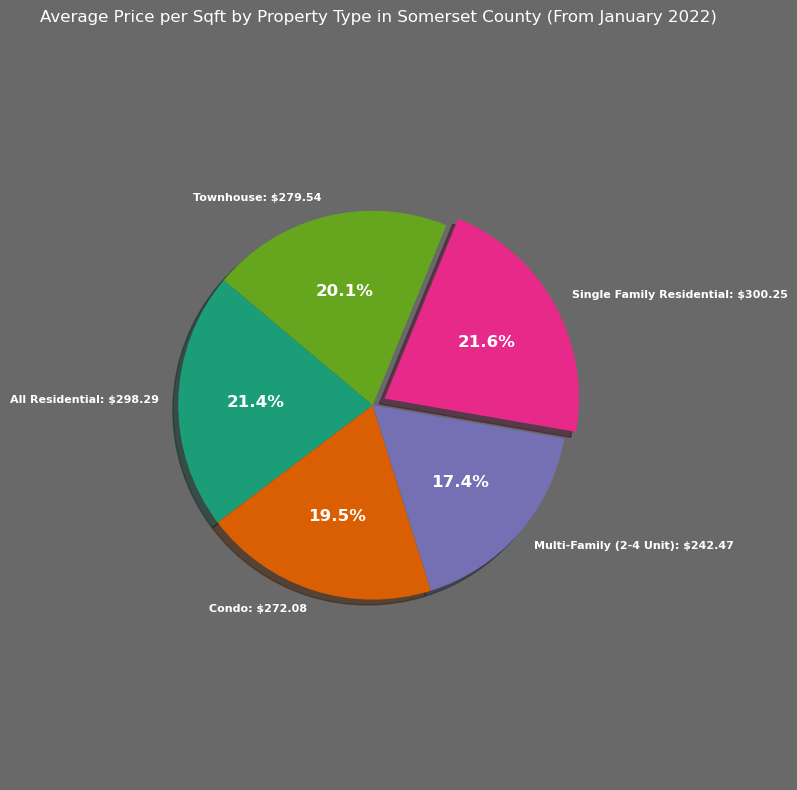

In [29]:

# Plotting the pie chart with dollar amounts as labels
plt.figure(figsize=(8, 8))
fig = plt.gcf()
fig.patch.set_facecolor('dimgray')  # Set background color of figure
labels = [f"{ptype}: ${price:.2f}" for ptype, price in zip(property_summary['Property Type'], property_summary['Average Price per Sqft'])]
colors = plt.cm.Dark2.colors  # Choosing a color palette
explode = (0, 0, 0, 0.07, 0)  # Explode a slice

# Plot pie chart
wedges, texts, autotexts = plt.pie(property_summary['Average Price per Sqft'], labels=labels, colors=colors, explode=explode,
                                   startangle=140, shadow=True, autopct='%1.1f%%',
                                   textprops={'color': 'white', 'fontsize': 8, 'weight': 'bold'})

plt.title('Average Price per Sqft by Property Type in Somerset County (From January 2022)', color='white', fontsize=12)

# Adjust label and text properties
plt.setp(autotexts, size=12, weight='bold')

plt.savefig('../Images/avg_price_per_sqft_somerset_pie.pdf', bbox_inches='tight')

plt.axis('equal')
plt.tight_layout()
plt.show()

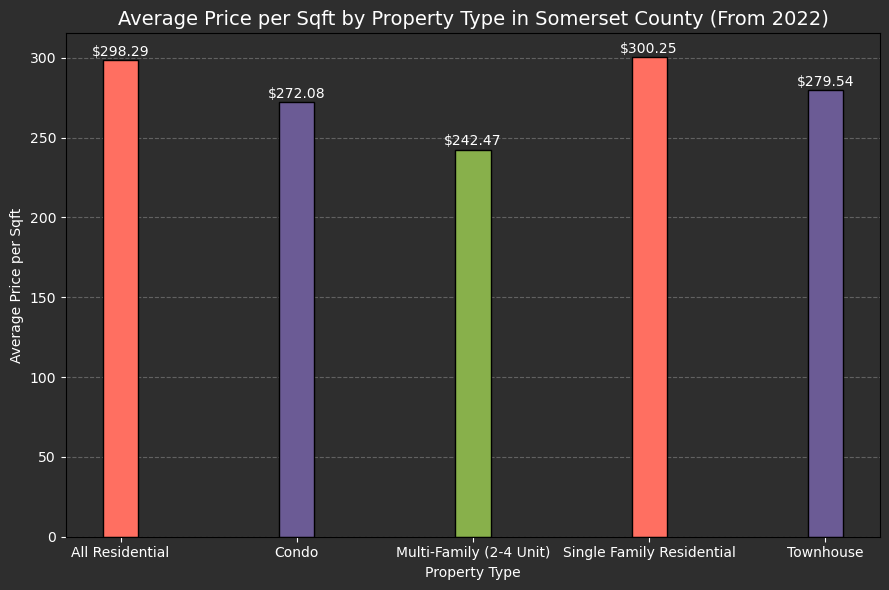

In [30]:
# Set up plot
fig, ax = plt.subplots(figsize=(9, 6))

# Define custom colors matching the example
colors = ['#FF6F61', '#6B5B95', '#88B04B']
edgecolors = ['black', 'black', 'black']  # Edge colors for bars

# Plotting the bars
bars = ax.bar(property_summary['Property Type'], property_summary['Average Price per Sqft'],
              color=colors, width=0.2, edgecolor=edgecolors, linewidth=1)

# Adding labels and titles
ax.set_xlabel('Property Type', color='white', fontsize=10)
ax.set_ylabel('Average Price per Sqft', color='white', fontsize=10)
ax.set_title('Average Price per Sqft by Property Type in Somerset County (From 2022)', color='white', fontsize=14)

# Customizing ticks and gridlines
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Adding values on top of bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f"${yval:.2f}", ha='center', va='bottom', color='white')

# Adjusting plot background and grid
dark_grey = '#2E2E2E'
fig.patch.set_facecolor(dark_grey)
ax.set_facecolor(dark_grey)
ax.set_axisbelow(True)

# Save image
plt.savefig('../Images/avg_price_per_sqft_somerset.pdf', bbox_inches='tight')

# Adjust spacing between bars
plt.subplots_adjust(wspace=0.1)  

plt.tight_layout()
plt.show()